<a href="https://colab.research.google.com/github/RaphaelMolina/Projeto_Completo_de_Predicao/blob/main/Projeto_Completo_de_Predi%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstração - Projeto Final

# Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Importar dados do Colab

[sample_data/california_housing_train.csv](https://)

In [2]:
dados=pd.read_csv('./sample_data/california_housing_train.csv')

In [3]:
dados.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


#Análise Exploratória


###Id - Id única de cada local
###latitude- latitude do local
###longitude- longitude do local
###median_age- mediana das idades das casas no local
###total_rooms - contagem do total de cômodos na região
###total_bedrooms - contagem do total de quartos na região
###population - população total na região
###households - número total de casas na região
###median_income- mediana da renda das pessoas na região (em dezenas de milhares por ano)
###median_house_value -mediana dos valores das casas da região - **variável-alvo**

Este conjunto de dados contém uma linha por grupo de blocos do censo. Um grupo de quarteirões é a menor unidade geográfica para a qual o U.S. Census Bureau publica dados de amostra (um grupo de quarteirões normalmente tem uma população de 600 a 3.000 pessoas).

In [4]:
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
dados.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 3.7 MB/s 


In [7]:
import sweetviz

In [8]:
analise=sweetviz.analyze(dados)

                                             |          | [  0%]   00:00 -> (? left)

In [9]:
analise.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Mapa de calor

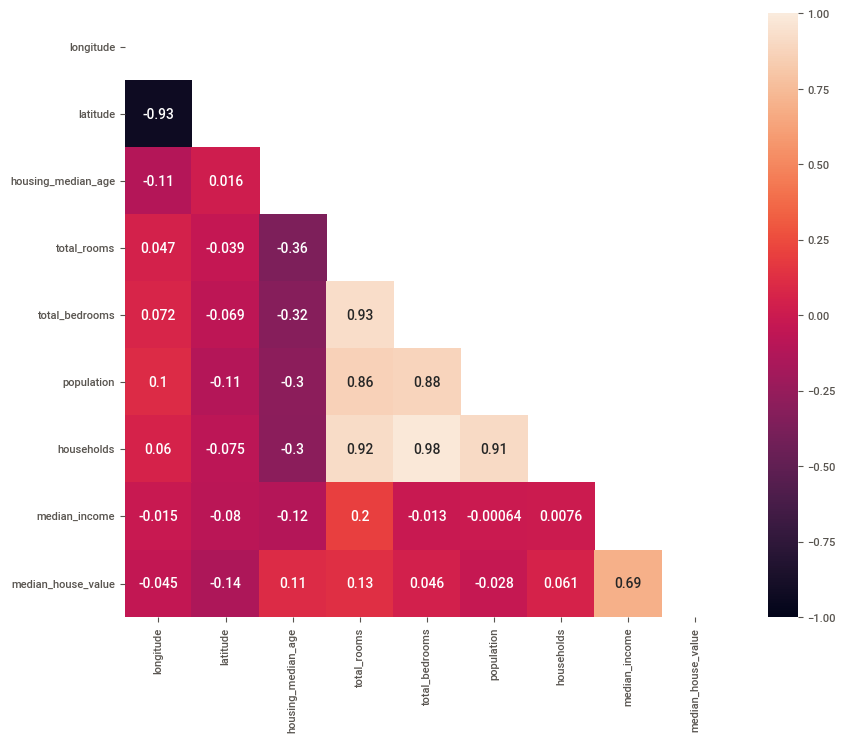

In [10]:
mask=np.triu(np.ones_like(dados.corr(), dtype=np.bool))
plt.figure(figsize=(10,8))
sns.heatmap(dados.corr(), mask=mask, square=True, annot=True, vmin=-1, vmax=1)
plt.show()

### Varias observações no mapa de calor, mas veja que interessante median_income com median_house_value e também households com total_bedrooms

# Iniciar o processo de Machine Leanrning

Vamos inicialmente determinar um preço alvo(preço médio das casas)

In [11]:
y=dados['median_house_value']
#y=dados.median_house_value
y

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

# Escolher as features (váriaveis a serem utilizadas do seu conjunto de dados)

In [12]:
features=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [13]:
X=dados[features]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


#Construindo o modelo

##Usar Scikit-Learn

**Define** = Escolha de modelo(define parâmetros)

**Fit** = Treinar

**Predict** = Fazer predição

**Evaluate** = Avaliar os resultados

In [14]:
from sklearn.neighbors import KNeighborsRegressor

# Vamos utilizar como teste um KNN Regresor

In [15]:
modelo=KNeighborsRegressor(7)

# Treinar o Modelo

In [16]:
modelo.fit(X,y)

KNeighborsRegressor(n_neighbors=7)

In [17]:
dados.head(5)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [18]:
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


# Fazer a predição

In [19]:
modelo.predict(X.head(5))

array([113671.42857143, 220957.14285714, 132700.        , 211886.        ,
       150714.28571429])

# Validar o modelo

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
predicao=modelo.predict(X)

In [22]:
predicao

array([113671.42857143, 220957.14285714, 132700.        , ...,
       134071.42857143, 131814.28571429, 300628.71428571])

In [23]:
mean_absolute_error(y, predicao)

65274.25744537815

# Vamos ver isso em um dataframe

In [24]:
dados2=pd.DataFrame(y)

In [25]:
dados2['predicao']=predicao

In [26]:
dados2.sample(10)

,median_house_value,predicao
16239,307000.0,234328.571429
59,40000.0,95342.857143
12228,94600.0,286900.142857
14781,85700.0,151142.857143
9765,500001.0,311585.857143
5601,500001.0,414971.857143
6337,139800.0,125685.714286
10633,134400.0,144471.428571
6258,170000.0,152414.285714
8915,290900.0,300985.714286


In [27]:
dados2.describe()

,median_house_value,predicao
count,17000.000000,17000.000000
mean,207300.912353,206562.988420
std,115983.764387,76645.241869
min,14999.000000,70042.857143
25%,119400.000000,150221.428571
50%,180400.000000,187214.285714
75%,265000.000000,245675.000000
max,500001.000000,500001.000000


# Validação

In [28]:
from sklearn.model_selection import train_test_split

# Pegar parte dos dados 80% para treinar e 20% para testar

In [29]:
treino_X, val_X, treino_y, val_y = train_test_split(X,y,random_state=1,train_size=0.8)

In [30]:
treino_X.shape

(13600, 8)

In [31]:
modelo2=KNeighborsRegressor(3)

In [32]:
modelo2.fit(treino_X, treino_y)

KNeighborsRegressor(n_neighbors=3)

In [33]:
predicao2=modelo2.predict(val_X)

# Analise do erro

In [34]:
mean_absolute_error(val_y, predicao2)

81475.73088235295

# Usando Arvores de decisão

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
#modelotree=DecisionTreeRegressor(random_state=1, max_depth=8)
modelotree=DecisionTreeRegressor(random_state=1, min_samples_leaf=15)

In [37]:
modelotree.fit(X, y)

DecisionTreeRegressor(min_samples_leaf=15, random_state=1)

In [38]:
predicaotree=modelotree.predict(X)

In [39]:
mean_absolute_error(y, predicaotree)

30824.120657959214

# Agora vamos fazer separado treino e teste

In [40]:
modelotree.fit(treino_X, treino_y)

DecisionTreeRegressor(min_samples_leaf=15, random_state=1)

In [41]:
predicao=modelotree.predict(val_X)

In [42]:
mean_absolute_error(val_y, predicao)

39663.62098113428

# Usando Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
modelorf=RandomForestRegressor(random_state=1, n_jobs=-1, n_estimators=200)

In [45]:
modelorf.fit(treino_X, treino_y)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=1)

In [46]:
predicao=modelorf.predict(val_X)

In [47]:
mean_absolute_error(val_y, predicao)

31134.331648529413